In [5]:
import numpy as np
from tqdm import tqdm
from multiprocessing import Pool
import matplotlib
from matplotlib import pyplot as plt
from qutip import *
plt.rc('font', size=45)          # controls default text sizes
# plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=30)    # fontsize of the tick labels
plt.rc('legend', fontsize=35)    # legend fontsize
# plt.rc('lines', markersize = 10)

matplotlib.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"]= 10,8
plt.rcParams['figure.dpi'] = 70
matplotlib.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.grid.which'] = "both"
props = dict(boxstyle='round', ec='black', fc='white')

In [6]:
plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]

In [7]:
def rg_step(J,Dj,rho,K,deltaD):
    if K == 1:
        return J**2 * rho / (Dj - J/4)
    else:
        return J**2 * rho * (1 - J*rho*K/2) / (Dj - J/4)
    
    
def rg_flow(J0, D0, K, rho, deltaD):
    # D_range = np.arange(D0, 0, -deltaD)
    D_range = D0 * 10 ** np.linspace(0, -3, int(D0/deltaD))
    J_range = [J0]
    for Dj in tqdm(D_range[1:]):
        if (1 - J_range[0]*rho*K/2) * (1 - J_range[-1]*rho*K/2) <= 0 or Dj - J_range[-1]/4 <= 0:
            J_range = J_range + [J_range[-1]]*(len(D_range) - len(J_range))
            break
        J_range.append(J_range[-1] + rg_step(J_range[-1],Dj,rho,K,deltaD))
    return J_range, D_range

 26%|█████████▋                           | 130/499 [00:00<00:00, 153594.23it/s]


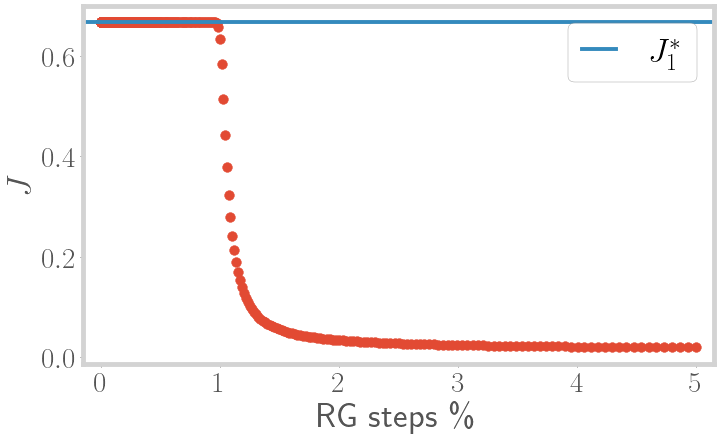

 30%|███████████▊                           | 30/99 [00:00<00:00, 203936.99it/s]


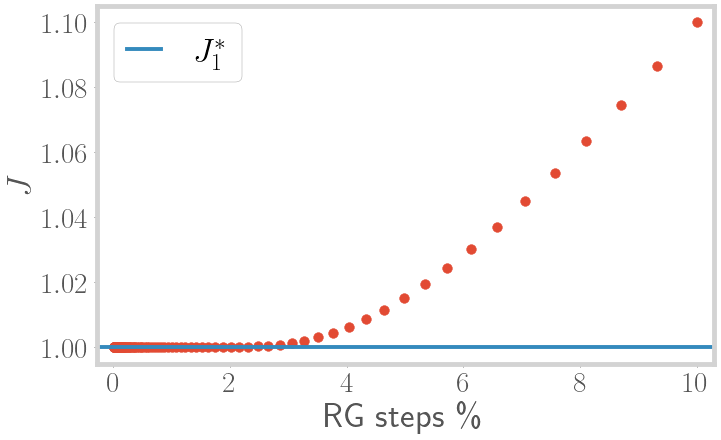

In [8]:
D0 = 5
K = 3
J0 = 0.02
rho = 1
deltaD = 0.01
J_range, D_range = rg_flow(J0, D0, K, rho, deltaD)
plt.scatter(D_range, J_range, color=cols[0])
plt.axhline(2/(K*rho), 0, 1, lw=4, color=cols[1], label=r"$J_1^*$")
plt.xlabel(r"RG steps \%")
plt.ylabel(r"$J$")
plt.legend()
plt.show()


D0 = 10
K = 2
J0 = 1.1
rho = 1
deltaD = 0.1
J_range, D_range = rg_flow(J0, D0, K, rho, deltaD)
plt.scatter(D_range, J_range, color=cols[0])
plt.axhline(2/(K*rho), 0, 1, lw=4, color=cols[1], label=r"$J_1^*$")
plt.xlabel(r"RG steps \%")
plt.ylabel(r"$J$")
plt.legend()
plt.show()

In [ ]:
def rg1(Jp,Jm,Dj,rho,K,deltaD):
    delta1 = Jp**2 * rho / (Dj - Jp/4)
    delta1 -= (rho**2 * Jp / 2) * ((K-1)*Jp**2 / (Dj - Jp/4) + Jm**2 / (Dj - Jm/4))
    return delta1


def rg2(Jp,Jm,Dj,rho,K,deltaD):
    delta2 = Jm**2 * rho / (Dj - Jm/4)
    delta2 -= (rho**2 * Jm / 2) * ((K-1)*Jp**2 / (Dj - Jp/4) + Jm**2 / (Dj - Jm/4))
    return delta2

In [ ]:
D0 = 20
deltaD = 0.1
rho = 0.1
K = 3
D_range = np.arange(D0, 0, -deltaD)
Jstar = 2/(K*rho)
deltaJ = 0.01
# print (Jstar, Jstar*K/(K-1))
Jp = Jstar + deltaJ
Jm = Jstar - deltaJ
y1 = []
y2 = []
x = []
for Dj in D_range:
    # print (Jp, Jm)
    x.append(Dj/D0)
    y1.append(Jp)
    y2.append(Jm)
    deltap = rg1(Jp,Jm,Dj,rho,K,deltaD)
    deltam = rg2(Jp,Jm,Dj,rho,K,deltaD)
    if Jp * (Jp + deltap) < 0 or  Jm * (Jm + deltam) < 0 or abs(deltap * deltam) < 1e-10:
        # print (Jp + deltap, Jm + deltam)
        break
    Jp += deltap
    Jm += deltam
    
plt.scatter(x[::3], y1[::3], marker="o", color=cols[0], label=r"$J_+$")
plt.scatter(x[::3], y2[::3], marker="o", color=cols[1], label=r"$J_-$")
plt.axhline(2/(K*rho), 0, 1, lw=4, color=cols[2], label=r"$2/K \rho$")
plt.axhline(2/((K-1)*rho), 0, 1, lw=4, color=cols[3], label=r"$2/(K-1)\rho$")
text = '\n'.join([r"$K={}$".format(K), r"$j_-<0$", r"$j_+>0$"])
plt.text(0.15, 0.4, text, bbox=props, horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.xlabel("fraction of RG completed")
plt.ylabel(r"$J_\pm$")
plt.legend()
plt.savefig("K to K-1.pdf", bbox_inches="tight")
plt.show()

In [ ]:
D0 = 15
deltaD = 0.05
rho = 1
D_range = np.arange(D0, 0, -deltaD)
for K in [3, 50]:
    Jstar = 2/(K*rho)
    plt.axhline(Jstar, 0, 1, lw=4, label=r"$\frac{2}{K \rho}$")
    deltaJ = -0.01
    x = []
    y = []
    Jp = Jstar + deltaJ
    Jm = Jstar - deltaJ
    for Dj in D_range:
        x.append(Dj/D0)
        y.append(Jp)
        deltap = rg1(Jp,Jm,Dj,rho,K,deltaD)
        deltam = rg2(Jp,Jm,Dj,rho,K,deltaD)
        if Jp * (Jp + deltap) < 0 or  Jm * (Jm + deltam) < 0 or abs(deltap * deltam) < 1e-10:
            break
        Jp += deltap
        Jm += deltam
        
    if K < 5:
        plt.scatter(x[::2], y[::2])
    else:
        # print (len(x))
        plt.scatter(x[:225][::5], y[:225][::5], color=cols[0])
        plt.scatter(x[223:], y[223:], color=cols[0])
    plt.xlabel("fraction of RG completed")
    plt.ylabel(r"$J_+$")
    plt.legend()
    plt.text(0.5, 0.11, r"$K={}$".format(K), bbox=props, horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    plt.savefig("irr_Jp_K={}.pdf".format(K), bbox_inches="tight")
    plt.show()

## Susceptibility along RG flow

In [28]:
def get_ham_real(K, J, t, h=0, num_sites=1):
    dim_per_chan = 2*num_sites
    total_dim = 1 + 2*num_sites*K
    Sx_imp, Sy_imp, Sz_imp = [tensor(Si, tensor([identity(2)]*(total_dim-1))) for Si in jmat(1/2)]
    Sp_imp = Sx_imp + 1j*Sy_imp
    Sm_imp = Sx_imp - 1j*Sy_imp
    c_bath = [tensor([sigmaz()]*(i) + [destroy(2)] + [identity(2)]*(total_dim - i -1)) for i in range(total_dim)]
    # c_all[0] is the impurity DOF, c_all[j*dim_per_chan + i] & c_all[j*dim_per_chan + i+1] 
    # for 1 <= i <= 2*num_sites and 0 <= j <= K-1 are the up and down states on the i^th site
    # of the j^th conduction channel.
    
    Sz_bath = [0.5 * (c_bath[j*dim_per_chan + 1].dag()*c_bath[j*dim_per_chan + 1] - 
                      c_bath[j*dim_per_chan + 2].dag()*c_bath[j*dim_per_chan + 2]) for j in range(K)]
    Sp_bath = [c_bath[j*dim_per_chan + 1].dag()*c_bath[j*dim_per_chan + 2] for j in range(K)]
    Sm_bath = [Sp_bath[j].dag() for j in range(K)]
    
    H_J = J * (Sz_imp * sum(Sz_bath) + 0.5 * Sp_imp * sum(Sm_bath) + 0.5 * Sm_imp * sum(Sp_bath))
    H_t = -t * sum([c_bath[i].dag() * c_bath[i+2] for i in range(total_dim-2)])
    H_h = - h * Sz_imp
    return H_J + (H_t + H_t.dag() if num_sites > 1 else 0) + H_h


def get_ham_momentum(K, J, Ek, h=0):
    num_sites = len(Ek)
    dim_per_chan = 2*num_sites
    total_dim = 1 + 2*num_sites*K
    Sx_imp, Sy_imp, Sz_imp = [tensor(Si, tensor([identity(2)]*(total_dim-1))) for Si in jmat(1/2)]
    Sp_imp = Sx_imp + 1j*Sy_imp
    Sm_imp = Sx_imp - 1j*Sy_imp
    c_bath = [tensor([sigmaz()]*(i) + [destroy(2)] + [identity(2)]*(total_dim - i -1)) for i in range(total_dim)]
    c_k_up = [[c_bath[1 + j*dim_per_chan + 2*i] for i in range(num_sites)] for j in range(K)]
    c_k_dn = [[c_bath[2 + j*dim_per_chan + 2*i] for i in range(num_sites)] for j in range(K)]
    # c_all[0] is the impurity DOF, c_all[j*dim_per_chan + i] & c_all[j*dim_per_chan + i+1] 
    # for 1 <= i <= 2*num_sites and 0 <= j <= K-1 are the up and down states on the i^th k-state
    # of the j^th conduction channel.
    
    c_0_up = [sum(c_k_up[j]) for j in range(K)]
    c_0_dn = [sum(c_k_dn[j]) for j in range(K)]
    
    Sz_bath = [0.5 * (c_0_up[j].dag() * c_0_up[j] - c_0_dn[j].dag() * c_0_dn[j]) for j in range(K)]
    Sp_bath = [c_0_up[j].dag() * c_0_dn[j] for j in range(K)]
    Sm_bath = [Sp_bath[j].dag() for j in range(K)]
    
    H_J = J * (Sz_imp * sum(Sz_bath) + 0.5 * Sp_imp * sum(Sm_bath) + 0.5 * Sm_imp * sum(Sp_bath))
    H_K = sum(Ek[i]*sum([c_k_up[j][i].dag()*c_k_up[j][i] + c_k_dn[j][i].dag()*c_k_dn[j][i] for j in range(K)]) for i in range(num_sites))
    H_h = - h * Sz_imp
    return H_J + H_K + H_h


def get_partition_func(H, T):
    E, _ = H.eigenstates()
    return sum(np.exp(-E/T))


def get_chi(args):
    K, J, D = args
    num_sites = 2
    assert num_sites % 2 == 0
    Ek = [-D/2]*int(num_sites/2) + [D/2]*int(num_sites/2)
    field = 1e-4
    # H_zero = get_ham_real(K, J, t, num_sites=num_sites)
    # H_field = get_ham_real(K, J, t, h=field, num_sites=num_sites)
    # H_field2 = get_ham_real(K, J, t, h=2*field, num_sites=num_sites)
    H_zero = get_ham_momentum(K, J, Ek)
    H_field = get_ham_momentum(K, J, Ek, h=field)
    H_field2 = get_ham_momentum(K, J, Ek, h=2*field)
    Z_zero = get_partition_func(H_zero, D)
    Z_field = get_partition_func(H_field, D)
    Z_field2 = get_partition_func(H_field2, D)
    M_zero = (Z_field - Z_zero)/(field * Z_zero)
    M_field = (Z_field2 - Z_field)/(field * Z_field)
    return (M_field - M_zero)/field


def get_chi_cumul(J_range, D_range):
    num_sites = 2
    assert num_sites % 2 == 0
    Z_zero = 0
    Z_field = 0
    Z_field2 = 0
    chi_zero = []
    field = 1e-4
    for J, D in tqdm(zip(J_range, D_range), total=len(D_range)):
        Ek = [-D/2]*int(num_sites/2) + [D/2]*int(num_sites/2)
        H_zero = get_ham_momentum(K, J, Ek)
        H_field = get_ham_momentum(K, J, Ek, h=field)
        H_field2 = get_ham_momentum(K, J, Ek, h=2*field)
        Z_zero += get_partition_func(H_zero, D)
        Z_field += get_partition_func(H_field, D)
        Z_field2 += get_partition_func(H_field2, D)
        M_zero = (Z_field - Z_zero)/(field * Z_zero)
        M_field = (Z_field2 - Z_field)/(field * Z_field)
        chi_zero.append((M_field - M_zero)/field)
    return chi_zero

In [ ]:
D0 = 5
J0 = 0.1
rho = 1
deltaD = 0.01
sp_fac = 20
for K in [1,2]:
    J_range, D_range = rg_flow(J0, D0, K, rho, deltaD)
    # args = zip([K]*int(len(J_range)/sp_fac), J_range[::sp_fac], D_range[::sp_fac])
    # chi_zero = list(tqdm(Pool().imap(get_chi, args), total=len(J_range)/sp_fac))
    chi_zero = get_chi_cumul(J_range[::sp_fac], D_range[::sp_fac])
    plt.scatter(D_range[::sp_fac], chi_zero)
    plt.yscale("log")
    plt.xscale("log")

 96%|█████████████████████████████████████████▎ | 24/25 [00:02<00:00, 12.60it/s]/tmp/ipykernel_31836/3876715130.py:52: RuntimeWarning: overflow encountered in exp
  return sum(np.exp(-E/T))
/tmp/ipykernel_31836/3876715130.py:91: RuntimeWarning: invalid value encountered in double_scalars
  M_zero = (Z_field - Z_zero)/(field * Z_zero)
/tmp/ipykernel_31836/3876715130.py:92: RuntimeWarning: invalid value encountered in double_scalars
  M_field = (Z_field2 - Z_field)/(field * Z_field)
 12%|████▉                                    | 3/25 [22:48<2:45:16, 450.77s/it]